<html style="background-color: white">
    <head style="background-color: white">
        <div style="position: relative; width: 1084px; margin: 50px auto; padding: 15px auto;">
            <figure style="max-width: 500px; float:left; padding: 10px; margin: 10px;">
                <a href="https://decide4ai.com/" target="_blank"><img style="padding: px; margin: 0;" src="./recursos/imagenes/FULLCOLOR.png" alt="logo decide"></a>
            </figure>
            <figure style="max-width: 500px; float:left; padding: 10px; margin: 32px 10px 10px 10px;">
                <a href="https://t3chfest.es/2023/" target="_blank"><img style="padding: 0; margin: 0;" src="./recursos/imagenes/t3f_logo.png" alt="logo t3ch festival"></a>
            </figure>
        </div>
        <div style="position: relative; border-top:3px solid #002060; border-bottom:3px solid #002060; margin-top: 300px; height: 96px; margin-right: auto; margin-left: auto;">
            <a href="./u1c1.ipynb" target="_blank"><img style="float: left; height: 64px; width: 76px;  margin:1% 1% 1% 7%;" src="./recursos/imagenes/ICON-FULLCOLOR-ROT.png" alt="icono decide4ai rotado"></a>
            <h1 style="color: #002060; text-align: center; margin: 2% 0; padding: 0; width: 70%; float: left;">
                <a href="./u1.ipynb" style="color: #002060">Unidad 1: Introducción a motores de recomendación</a><br><a href="./indice.ipynb" style="font-size: 10px; color: #bf27b8">Volver al índice</a>
            </h1>
            <a href="./u1c3.ipynb" target="_blank"><img style="float: left; height: 64px; width: 76px; margin:1% auto 1% 1%;" src="./recursos/imagenes/ICON-FULLCOLOR.png" alt="icono decide4ai"></a>
        </div>
        <ol style="text-align: left; list-style-type: none; margin-top: 75px;">
            <li style="margin: 20px 0;"><h5><a style="color: #f47b4c" href="./u1c1.ipynb" target="_blank">¿Qué es un motor de recomendación?</a></h5></li>
            <li style="margin: 20px 0;"><h5><a style="color: #fc5100" href="./u1c2.ipynb" target="_blank"><strong>Entendiendo los datos.</strong></a></h5></li>
            <li style="margin: 20px 0;"><h5><a style="color: #f47b4c" href="./u1c3.ipynb" target="_blank">¿Qué tipos de motores de recomendación existen?</a></h5></li>
            <li style="margin: 20px 0;"><h5><a style="color: #f47b4c" href="./u1c4.ipynb" target="_blank">¿Cómo defino el objetivo de un motor de recomendación, y qué problemas puedo tener?</a></h5></li>
            <li style="margin: 20px 0;"><h5><a style="color: #f47b4c" href="./u1c5.ipynb" target="_blank">¿Qué métricas uso para un motor de recomendación?</a></h5></li>
            <li style="margin: 20px 0;"><h5><a style="color: #f47b4c" href="./u1c6.ipynb" target="_blank">¿Cómo pongo en producción un motor de recomendación?</a></h5></li>
        </ol>
    </head>
    <body>
        <h1 style="color: #fc5100; margin-top: 100px;">Entendiendo los datos.</h1>
        <p style="font-size: 18px; color: #002060;">
            Para este taller vamos a usar los datos de una competición de <a style="color: #bf27b8" href="https://www.kaggle.com/competitions/h-and-m-personalized-fashion-recommendations/overview">Kaggle</a> de H&M. Es necesario saber lo siguiente sobre los datos:
        </p>
        <ul style="text-align: left; font-size: 18px; color: #002060;">
            <li style="margin: 20px 0;">Hay un archivo que se llama <strong>articles.csv</strong>. Este contiene toda la información sobre los artículos. Algunas de las columnas son:</li>
            <ul style="text-align: left; font-size: 18px; color: #002060;">
                <li style="margin: 20px 0;"><strong>article_id</strong>: Es el identificador del artículo. Este designa un artículo concreto.</li>
                <li style="margin: 20px 0;"><strong>product_code</strong>: Es un identificador un nivel superior al anterior. Es decir, article_id designa una camiseta de un color, mientras que product_code designa esa camiseta, sin especificar color.</li>
                <li style="margin: 20px 0;">El resto de columnas son auto-explicativas.</li>
            </ul>
            <li style="margin: 20px 0;">Hay un archivo que se llama <strong>customer.csv</strong>. Este contiene toda la información asociada a los clientes.</li>
            <ul style="text-align: left; font-size: 18px; color: #002060;">
                <li style="margin: 20px 0;"><strong>customer_id</strong>: Es el identificador del cliente.</li>
                <li style="margin: 20px 0;">El resto de columnas detallan si están dados de alta en la newsletter o son auto-explicativas.</li>
            </ul>
            <li style="margin: 20px 0;">Hay un archivo que se llama <strong>transactions_train.csv</strong>. Este contiene toda la información de los productos que compran los clientes. Un artículo puede comprarlo varias veces un cliente, por lo que en este set de datos no se consideran duplicados.</li>
            <ul style="text-align: left; font-size: 18px; color: #002060;">
                <li style="margin: 20px 0;"><strong>sales_channel_id</strong>: 1 designa que la compra se ha realizado en un establecimiento, mientras que 2 es una compra on-line.</li>
                <li style="margin: 20px 0;">El resto de columnas son auto-explicativas.</li>
            </ul>
            <li style="margin: 20px 0;">Dentro de la carpeta images se encuentran imágenes de los productos.</li>
        </ul>
    </body>
</html>

<h2 style="color: #f47b4c; margin-top: 100px;">Importamos y definimos variables.</h2>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import tools

pd.set_option("display.max_columns", None)

In [2]:
# Con el fin de disminuir la carga en memoria de los datos, se define
# el tipo de variable que hay en cada columna.
dtypes_articles = {
    "article_id": object, 
    "product_code": object, 
    "prod_name": object,
    "product_type_no": np.int32, 
    "product_type_name": object,
    "product_group_name": object,
    "graphical_appearance_no": np.int64, 
    "graphical_appearance_name": object,
    "colour_group_code": np.int16, 
    "colour_group_name": object,
    "perceived_colour_value_id": object, 
    "perceived_colour_value_name": object,
    "perceived_colour_master_id": object, 
    "perceived_colour_master_name": object,
    "department_no": np.int32, 
    "department_name": object,
    "index_code": object,
    "index_name": object,
    "index_group_no": np.int16, 
    "index_group_name": object,
    "section_no": np.int16, 
    "section_name": object,
    "garment_group_no": np.int32, 
    "garment_group_name": object,
    "detail_desc": object,
}

dtypes_customers = {
    "customer_id": object, 
    "FN": np.float16, 
    "Active": np.float16, 
    "club_member_status": object, 
    "fashion_news_frequency": object,
    "age": np.float32,
    "postal_code": "category",
}

dtypes_transactions = {
    "t_dat": "category",
    "customer_id": "category",
    "article_id": "category",
    "price": np.float16,
    "sales_channel_id": np.int16,
}

path_articles = "./recursos/datos/articles.csv"
path_customers = "./recursos/datos/customers.csv"
path_transactions = "./recursos/datos/transactions_train.csv"

<h2 style="color: #f47b4c; margin-top: 100px;">Exploración de los datos de artículos.</h2>

In [3]:
# Leemos los datos. ¡Hay que usar el tipado para ahorrar en memoria!
articles = pd.read_csv(path_articles, dtype=dtypes_articles)

In [4]:
# ¿Qué contienen los datos?
articles.head(3)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,0108775015,0108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,0108775044,0108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,0108775051,0108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


In [5]:
# ¿Cuál es el tamaño de los datos?
art_nrows, art_ncols = articles.shape
print(f"El dataset de artículos tiene {art_nrows:,} filas y {art_ncols:,} columnas.")

El dataset de artículos tiene 105,542 filas y 25 columnas.


In [6]:
# ¿Cuántos artículos únicos hay?
n_articles = articles["article_id"].nunique()
print(f"Hay un total de {n_articles:,} artículos.")

# ¿Cuántos productos únicos hay?
n_products = articles["product_code"].nunique()
print(f"Hay un total de {n_products:,} productos.")

Hay un total de 105,542 artículos.
Hay un total de 47,224 productos.


In [7]:
# ¿Cuál es la proporción de artículos por "index_group_name"?
100 * articles["index_group_name"].value_counts(normalize=True)

Ladieswear       37.650414
Baby/Children    32.888329
Divided          14.353528
Menswear         11.893843
Sport             3.213886
Name: index_group_name, dtype: float64

In [8]:
# ¿Cuál es la proporción de productos por "index_group_name"?
(100 * articles.groupby("index_group_name")["product_code"].nunique() / n_products).sort_values(ascending=False)

index_group_name
Ladieswear       43.141199
Baby/Children    30.156276
Divided          14.416398
Menswear          9.378706
Sport             3.098001
Name: product_code, dtype: float64

In [9]:
# Genera un artículo aleatorio
random_article: str = articles["article_id"].sample(n=1).values[0]
random_article

'0349301045'

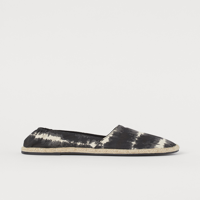

In [10]:
tools.show_article(article_id=random_article)

<h2 style="color: #f47b4c; margin-top: 100px;">Exploración de los datos de clientes.</h2>

In [11]:
# Leemos los datos. ¡Hay que usar el tipado para ahorrar en memoria!
customers = pd.read_csv(path_customers, dtype=dtypes_customers)

In [12]:
# ¿Qué contienen los datos?
customers.head(3)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...


In [13]:
# ¿Cuál es el tamaño de los datos?
cust_nrows, cust_ncols = customers.shape
print(f"El dataset de clientes tiene {cust_nrows:,} filas y {cust_ncols:,} columnas.")

El dataset de clientes tiene 1,371,980 filas y 7 columnas.


In [14]:
# ¿Cuántos clientes únicos hay?
n_customers = customers["customer_id"].nunique()
print(f"Hay un total de {n_customers:,} clientes.")

Hay un total de 1,371,980 clientes.


In [15]:
# ¿Hay valores nulos en la edad?
age_null_values = customers[customers["age"].isnull()].shape[0]
print(f"Hay un total de {age_null_values:,} clientes que no tienen la edad informada. Lo que corresponde a un {100*age_null_values/n_customers:.3}%.")

Hay un total de 15,861 clientes que no tienen la edad informada. Lo que corresponde a un 1.16%.


In [16]:
customers[customers["age"].notnull()]["age"].describe()

count    1.356119e+06
mean     3.638697e+01
std      1.432235e+01
min      1.600000e+01
25%      2.400000e+01
50%      3.200000e+01
75%      4.900000e+01
max      9.900000e+01
Name: age, dtype: float64

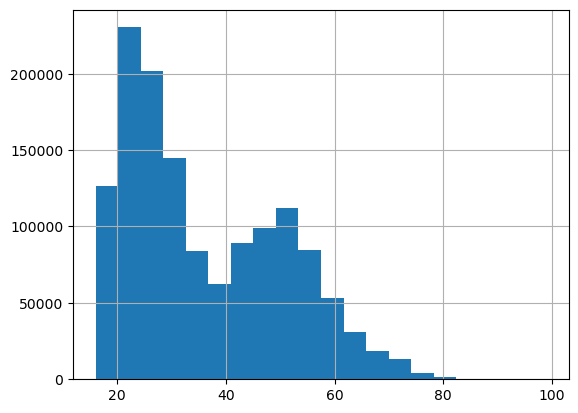

In [17]:
customers["age"].hist(bins=20);

<h2 style="color: #f47b4c; margin-top: 100px;">Exploración de los datos de transacción.</h2>

In [18]:
# Leemos los datos. ¡Hay que usar el tipado para ahorrar en memoria!
transactions = pd.read_csv(path_transactions, dtype=dtypes_transactions)

In [19]:
# ¿Qué contienen los datos?
transactions.head(3)

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0663713001,0.050842,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0541518023,0.030487,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0505221004,0.015236,2


In [21]:
# ¿Cuál es el tamaño de los datos?
tran_nrows, tran_ncols = transactions.shape
print(f"El dataset de transacciones tiene {tran_nrows:,} filas y {tran_ncols:,} columnas.")

El dataset de transacciones tiene 31,788,324 filas y 5 columnas.


In [22]:
# ¿Cuál es el top3 de artículos más vendidos?
transactions["article_id"].value_counts().head(3)

0706016001    50287
0706016002    35043
0372860001    31718
Name: article_id, dtype: int64

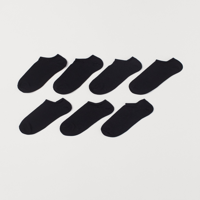

In [23]:
artid = "0372860001"
tools.show_article(article_id=artid)

In [24]:
# ¿Cuál es el top3 de artículos más vendidos?
# Esta vez sin contar que un cliente puede comprar varias veces el mismo artículo.
transactions.drop_duplicates(subset=["customer_id", "article_id"], keep="first")["article_id"].value_counts().head(3)

0706016001    32251
0372860001    25559
0706016002    25485
Name: article_id, dtype: int64

In [25]:
# Sabiendo que el producto se puede extraer del identificador del artículo,
# ¿qué producto es el que más se ha vendido?
transactions["product_id"] = transactions["article_id"].str[:-3]
transactions["product_id"].value_counts().head(3)

0706016    183921
0562245    158557
0610776    137799
Name: product_id, dtype: int64

In [26]:
# ¿Cuál es el top3 de artículos que más ingresos han generado?
transactions.groupby("article_id")["price"].sum().sort_values().tail(3)

article_id
0568601006     939.405823
0706016002    1136.135620
0706016001    1631.468628
Name: price, dtype: float32

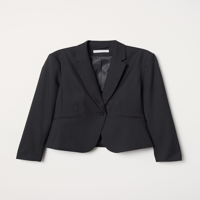

In [27]:
artid = "0568601006"
tools.show_article(article_id=artid)

In [28]:
# ¿Cuál es el top3 de clientes que más artículos han comprado?
transactions["customer_id"].value_counts().head(3)

be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b    1895
b4db5e5259234574edfff958e170fe3a5e13b6f146752ca066abca3c156acc71    1441
49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05b50a4cd88e34d0748f    1364
Name: customer_id, dtype: int64

In [29]:
# ¿Cuál es el top3 de clientes que más artículos han comprado?
# Esta vez que ha hayan comprado productos diferentes.
transactions.drop_duplicates(subset=["customer_id", "article_id"], keep="first")["customer_id"].value_counts().head(3)

be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b    1346
cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed6012e7e5bea016b4d6    1121
49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05b50a4cd88e34d0748f    1088
Name: customer_id, dtype: int64

In [30]:
# ¿Cuál es el rango de fechas sobre las que se disponen datos?
transactions["t_dat"] = pd.to_datetime(transactions["t_dat"].astype(object), format="%Y-%m-%d")
transactions["t_dat"].describe(datetime_is_numeric=True)

count                         31788324
mean     2019-09-15 17:27:46.894452992
min                2018-09-20 00:00:00
25%                2019-03-28 00:00:00
50%                2019-08-25 00:00:00
75%                2020-03-29 00:00:00
max                2020-09-22 00:00:00
Name: t_dat, dtype: object

In [31]:
# ¿Puede algún artículo estar descatalogado?
descat_aux = transactions.groupby("article_id")["t_dat"].agg(["min", "max"])
descat_aux["range"] = descat_aux["max"] - descat_aux["min"]
descat_aux.sort_values(by="range").head(5)

,min,max,range
article_id,,,
0536991001,2019-01-11,2019-01-11,0 days
0577521003,2018-12-20,2018-12-20,0 days
0874370003,2020-09-12,2020-09-12,0 days
0577480004,2018-12-22,2018-12-22,0 days
0570474033,2018-12-21,2018-12-21,0 days


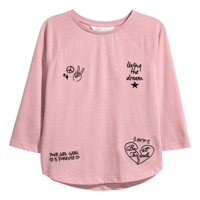

In [32]:
artid = "0536991001"
tools.show_article(article_id=artid)

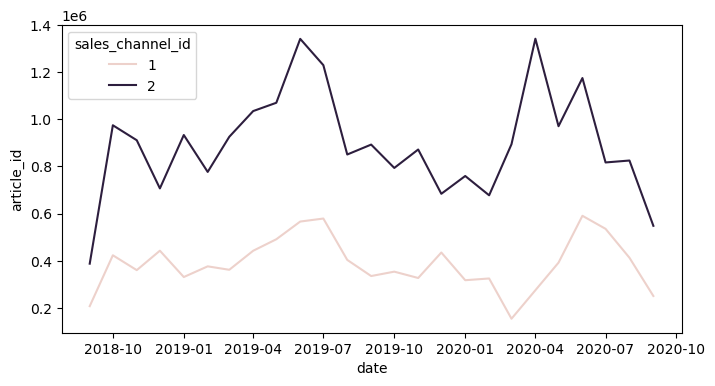

In [33]:
# ¿Cuál es el histórico de ventas por canal?
transactions["year"] = transactions["t_dat"].dt.year
transactions["month"] = transactions["t_dat"].dt.month
ts_transactions = transactions.groupby(
    ["year", "month", "sales_channel_id"], as_index=False
)["article_id"].count()
ts_transactions["date"] = pd.to_datetime(
    ts_transactions["year"].astype(str) + "-" + ts_transactions["month"].astype(str) + "-01", 
    format="%Y-%m-%d"
)
plt.figure(figsize=(8, 4))
sns.lineplot(data=ts_transactions, x="date", y="article_id", hue="sales_channel_id");